# 乱数とモンテカルロ法

**乱数**とは、サイコロを振って得たようなでたらめな数を次々に作る方法、またはそうして生成された数列を指す。  
物理現象を利用した**物理乱数**と漸化式などに基づく**疑似乱数**とがある。  
乱数の主な用途は、標本抽出、モンテカルロ計算、アルゴリズムや方法のテスト、暗号、シミュレーションなどである。

# モンテカルロ法

乱数を用いたシミュレーションを多数回実施し近似的な解を求める手法。  
**モンテカルロ法**で$\pi$や$\pi/4$を求める問題は基本的であり、頻出である。

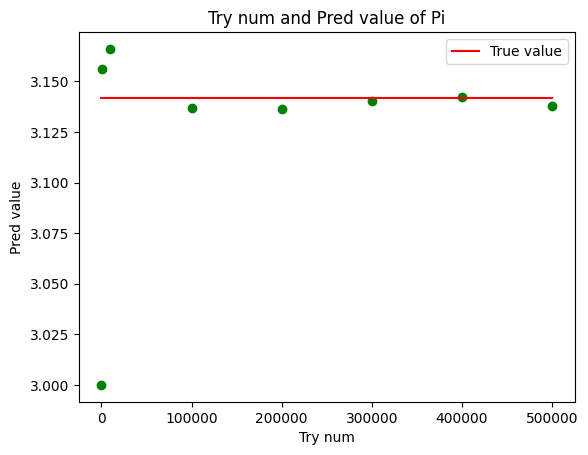

In [1]:
# 円周率(π)を求めてみる
# 以下の面積比を用いて導出する
# プロットした点の個数(N) : 円(1/4)の領域に入った点の個数(Ni)　= 1 : π/4
import numpy as np
import matplotlib.pyplot as plt

# 試行回数のリスト
n_tot = [100,1000,10000,100000,200000,300000,400000,500000]

for i in n_tot:
    # 乱数列の作成
    x1 = np.random.rand(i,2)
    # 全ての乱数列を2乗
    x2 = x1**2
    # 乱数列の2乗和の作成
    x3 = np.sum(x2,axis=-1)
    # 乱数列のルート 
    x4 = x3**0.5
    # 2乗和のルートが1未満の数の個数の計算
    x5 = np.count_nonzero(x4 < 1)    
    plt.plot(i,4*x5/i,color='green',marker='o')

x = [0,500000]
y = [np.pi,np.pi]
plt.plot(x, y, color = 'red',linestyle='solid', label='True value')

plt.title('Try num and Pred value of Pi')
plt.xlabel('Try num')
plt.ylabel('Pred value')
plt.legend()
plt.show() # 試行回数が増えるにつれ、3.14に近似することがわかる

# 乱数生成：逆関数法

シミュレーションで大事な方法の一つに、指定された確率分布に従う乱数の発生がある。  
あらゆる確率分布に従う乱数生成は、一様分布、つまり一様乱数の発生に基づいて行われる。  
区間(0,1)の一様分布に従う確率変数を$U$とすると確率密度関数と分布関数はそれぞれ、$x \in (0,1)$で次のようになる。
$$
p_U(x) = 1, \quad F(x) = \int_{0}^{x} p_U(x)dx = x
$$
1変量の確率変数$X$が確率密度関数$p_U(x)$と分布関数$F_X(X)$をもつとする。  
もし、$F_X(x)$の逆関数$F_X^{-1}(u)$が得られる場合、次の**逆関数法**と呼ばれる方法でXの乱数が生成できる。  
1.$U(0,1)$から一様乱数$u$を一つ得る  
2.$x=F_X^{-1}(u)$とする

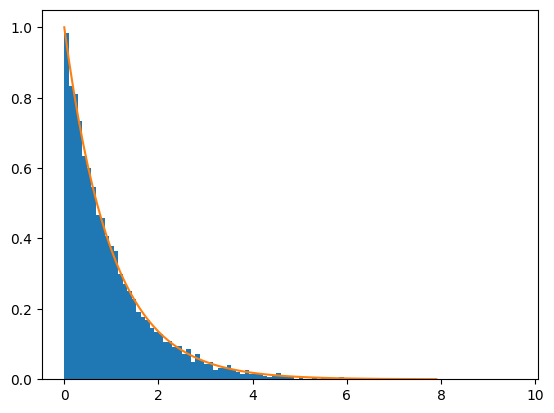

In [2]:
# 逆関数法で一様変数から指数分布に従う乱数を生成する

U_data = np.random.rand(10000) # 一様分布に従う乱数を10000個生成

# 逆関数方法で指数分布に従うデータを生成
# 逆関数：-1/λ * log(1-u)
result_data = -np.log(1 - U_data) # λ=1の場合

# 乱数データのヒストグラムと指数分布の確率密度関数を描画
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(111)
ax.hist(result_data, bins=100, density=True)
ax.plot(np.arange(0, 8, 0.1), np.exp(-1*np.arange(0, 8, 0.1)))
plt.show()

# 乱数生成：採択棄却法

確率変数$x$の確率密度関数を$f(x)$とし、計算可能な関数$l(x)$を使って$f(x)=c^{-1} l(x), c= \int l(x) dx>0$とする。  
正規化定数$c$は積分を1にするためのものであり、計算できなくてもよい。  
このとき、ある確率密度関数$g(x)$と定数$M>0$があって、すべての$x$で
$$
M g(x) \geq l(x)
$$
が成り立つと仮定する。  
さらに、ここでは$g(x)$を密度にもつ確率変数の乱数生成はできると仮定する。  
次に示す方法は**採択・棄却法**とよばれ、$g(x)$と一様乱数$u$を利用して$f(x)$を密度にもつ確率変数Xの乱数が生成できる。  
1.$g(x)$から乱数$x$と$U(0,1)$から一様乱数をとる。  
2.$r=l(x)/(M g(x))$として$u \leq r$ならば$x$を出力し、そうでないならば1.に戻る。

M = 2.66974399494535
サンプル数:100000 => 37555
実際の受理率:0.37555
理論的な受理率:0.37456774952703664


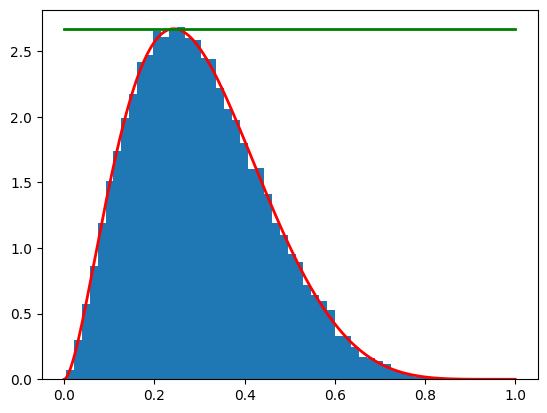

In [3]:
# 採択棄却法を実装する
import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標とする密度関数f
f = beta(a=2.7, b=6.3).pdf

# 提案分布(一様分布)
gv = uniform
g = gv.pdf

# 分布の上限を指定する定数Mを設定
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print(f"M = {M}")

# 受理・棄却法
rand_count = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=rand_count)

# 一様乱数を生成
U = uniform.rvs(size=rand_count)

# Yか採択の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(f"サンプル数:{len(Y)} => {len(X)}")
print(f"実際の受理率:{len(X) / float(len(Y))}")
print(f"理論的な受理率:{1.0 / M}")

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布(一様分布)を描画
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

# 採択した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

# モンテカルロ積分

関数$g(x)$の区間(0,1)上の積分を推定する問題
$$
\theta = \int_{0}^{1} g(x)dx
$$
を考える。確率変数XがU(0,1)に従うとき
$$
E[g(x)] = \int_{0}^{1} g(x) \cdot 1 dx =  θ
$$
となる。  
したがって、$X_1,..,X_m$が$U(0,1)$からの無作為標本とするとき、以下の$g(X_1),..,g(X_m)$の標本平均$\hat{\theta}$は、大数の弱法則により$m \rightarrow \infty$のとき、$\theta$に確率収束する。
$$  
\hat{\theta} = \frac{1}{m} \sum_{i=1}^{m} g(X_i)
$$
$m$個の$U(0,1)$上の一様乱数$x_1,..,x_m$を発生させ、$\theta$を$\hat{\theta}=\frac{1}{m} \sum_{i=1}^{m} g(X_i)$で推定する方法を**単純モンテカルロ法**という。 

In [4]:
# 単純モンテカルロ法による円周率の計算を実施
# *先頭の計算と同じ
def f(x):
    return 1.0/(1.0+x**2)

# 試行回数のリスト
calc_count_list = [10, 10**2, 10**3, 10**4, 10**5, 10**6]

for N in  calc_count_list:
    count = 0.0
    for i in range(N):
        x = np.random.rand(1)  # [0,1]までの一様乱数をxに格納
        y = np.random.rand(1)  # [0,1]までの一様乱数をyに格納
        if y < f (x):   #もし円の中に入ったらそれをカウントする
            count +=1.0
    area = 4*count/N # 積分結果

    print(N, ", ", area, ", ", abs((np.pi-area)/np.pi))

10 ,  2.4 ,  0.23605627315890237
100 ,  3.2 ,  0.018591635788130244
1000 ,  3.028 ,  0.0361576646354818
10000 ,  3.122 ,  0.0062365353342055205
100000 ,  3.1362 ,  0.0017165349503956255
1000000 ,  3.14098 ,  0.0001950136944371747


# ジャックナイフ法とブートストラップ法

母集団$F$からの無作為標本を$\{x_1,..,x_n\}$とし、$x=(x_1,..,x_n)$とおく、母数$\theta = \theta(F)$に関心があり、$\theta$の推定量$\hat{\theta}$が$x$の関数$T_n$で$\hat{\theta}=T_n(x)$と書かれているとする。    
$T_n(x)$を統計量という。たとえば、$\theta$が母平均の場合、$\hat{\theta}=T_n(x)=(x_1+\cdot \cdot +x_n)/n$である。  
$\hat{\theta}$の標準誤差のジャックナイフ推定量を構成するために、$x$から$x_j$を除いたベクトルを$x_{(-j)} = (x_1,..x_{j-1},x_{j+1},..x_n), j=1,..,n$ とする。  
また
$$
\hat{\theta}_j = T_{n-1}(x_{(-j)}), \quad \bar{\hat{\theta}} = \frac{1}{n} \sum_{j=1}^{n} \hat{\theta}_{(j)}
$$
とおくと、推定量$\hat{\theta}$の標準誤差のジャックナイフ推定量$\hat{se}_{jack}$は以下で与えられる。  
$$
\hat{se}_{jack} = \sqrt{\frac{n-1}{n} \sum_{j=1}^{n} (\hat{\theta}_{(j)}-\bar{\hat{\theta}}_{(\cdot)})^2}
$$
端的にいうと、**ジャックナイフ法**とは、無作為標本から得られた母数の推定量が不偏でないとき，標本を分割して、幾つかの観測値を抜き取っては反復計算することで推定量のバイアスを減少させる方法のことで、この方法によって得られた推定量をジャックナイフ推定量という。

In [5]:
# ジャックナイフ法を実装
import sympy

def jackknife_estimator(r):
    divs = np.array(sympy.divisors(n))
    idx = np.abs(divs-np.sqrt(len(r))).argmin()
    bin_size = divs[idx]
    r2 = r ** 2
    r4 = r ** 4
    u_all = np.average(r4)/np.average(r2)**2
    r2 = [np.average(r2[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    r4 = [np.average(r4[i:i+bin_size]) for i in range(0, len(r), bin_size)]
    u_jn = []
    m = len(r) // bin_size
    for i in range(m):
        r2_i = np.average(np.delete(r2,i))
        r4_i = np.average(np.delete(r4,i))
        u_jn.append(r4_i/r2_i**2)
    return m*u_all - (m-1)*np.average(u_jn)

samples = np.array([16,32,64,128,256])
n_trials = 128**2
for n in samples:
    u = [jackknife_estimator(np.random.randn(n)) for _ in range(n_trials)]
    print(f"{n} {np.average(u)}")

16 2.947306868389145
32 2.990918748514013
64 3.0069206923318643
128 3.0004607278801156
256 3.000048254562049


ブートストラップ標本$\{x^*_1,..,x^*_n\}$は、標本$\{x_1,..,x_n\}$を既知の母集団$F_n$とする独立同一サンプルによって得られる。  
$x_j(j=1,..,n)$に確率$1/n$を与えて作る分布関数を**経験分布関数**といい、。ブートストラップ確率変数$X^*$は$P(X^*=x_i)=1/n$をもつ。    
ブートストラップ法は何度でも抽出できるため、$b$回目のブートストラップ標本$x^{*(b)}=(x_1^{*(b)},..,x_n^{*(b)})$に応じて、$\hat{\theta}^*(b)=T_n(x^{*(b)})$を反復回数$B$として$b=1,..,B$で構成する。  
この一連の方法を**ブートストラップ法**あるいは、**ノンパラメトリックブートストラップ法**という。  
他方、母集団に適当なパラメータを持つ確率分布が仮定され、そのパラメータに推定量を代入した確率分布からのリサンプリング法を**パラメトリックブートストラップ法**という。  
ブートストラップ法における$\hat{\theta}$の標準誤差の推定は
$$
\hat{se}_B = \sqrt{\frac{1}{B-1} \sum_{b=1}^{B}(\hat{\theta}^*(b)-\bar{\hat{\theta}^*})^2}
$$
で与えられる。  
端的に言うと、ブートストラップ法は、標本集団から標本集団と同じ数だけランダムに値を再抽出し、新しいデータセットを取得し統計値を計算することで母集団の性質を推定するための方法である。

相関行列：
[[1.         0.38754773]
 [0.38754773 1.        ]]


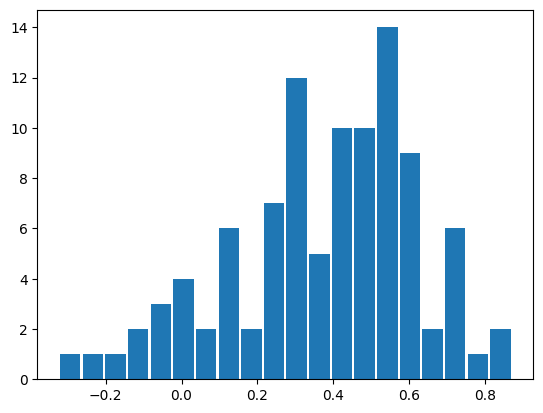

In [6]:
# ブートストラップ法を実装

#英語の点数
scoE = np.array([60, 89, 65, 60, 73, 52, 70, 65, 65, 70])
#数学の点数
scoM = np.array([88, 82, 60, 65, 85, 56, 57, 75, 42, 90])

scoTotal = np.array([scoE, scoM])
print(f"相関行列：\n{np.corrcoef(scoTotal)}")

# 相関係数リスト
r_list = []

# 点数リスト
scoE_data = []
scoM_data = []

for i in range(0,100):
    for j in range(0,10):
        #データから10個のデータをランダムに取り出し標本を作成
        var = np.random.randint(0,10)
        scoE_data.append(scoE[var])
        scoM_data.append(scoM[var])
        
    #作られた標本を元に相関係数を導出
    r = np.corrcoef(scoE_data, scoM_data)
        
    #相関係数を相関係数リストに代入
    r_list.append(r[0][1])

    #点数リストを初期化
    scoE_data.clear()
    scoM_data.clear()

plt.hist(r_list, bins=20, rwidth=0.9)
plt.show() # 導出した相関係数0.38(理論値)を中心とした正規分布に近似する